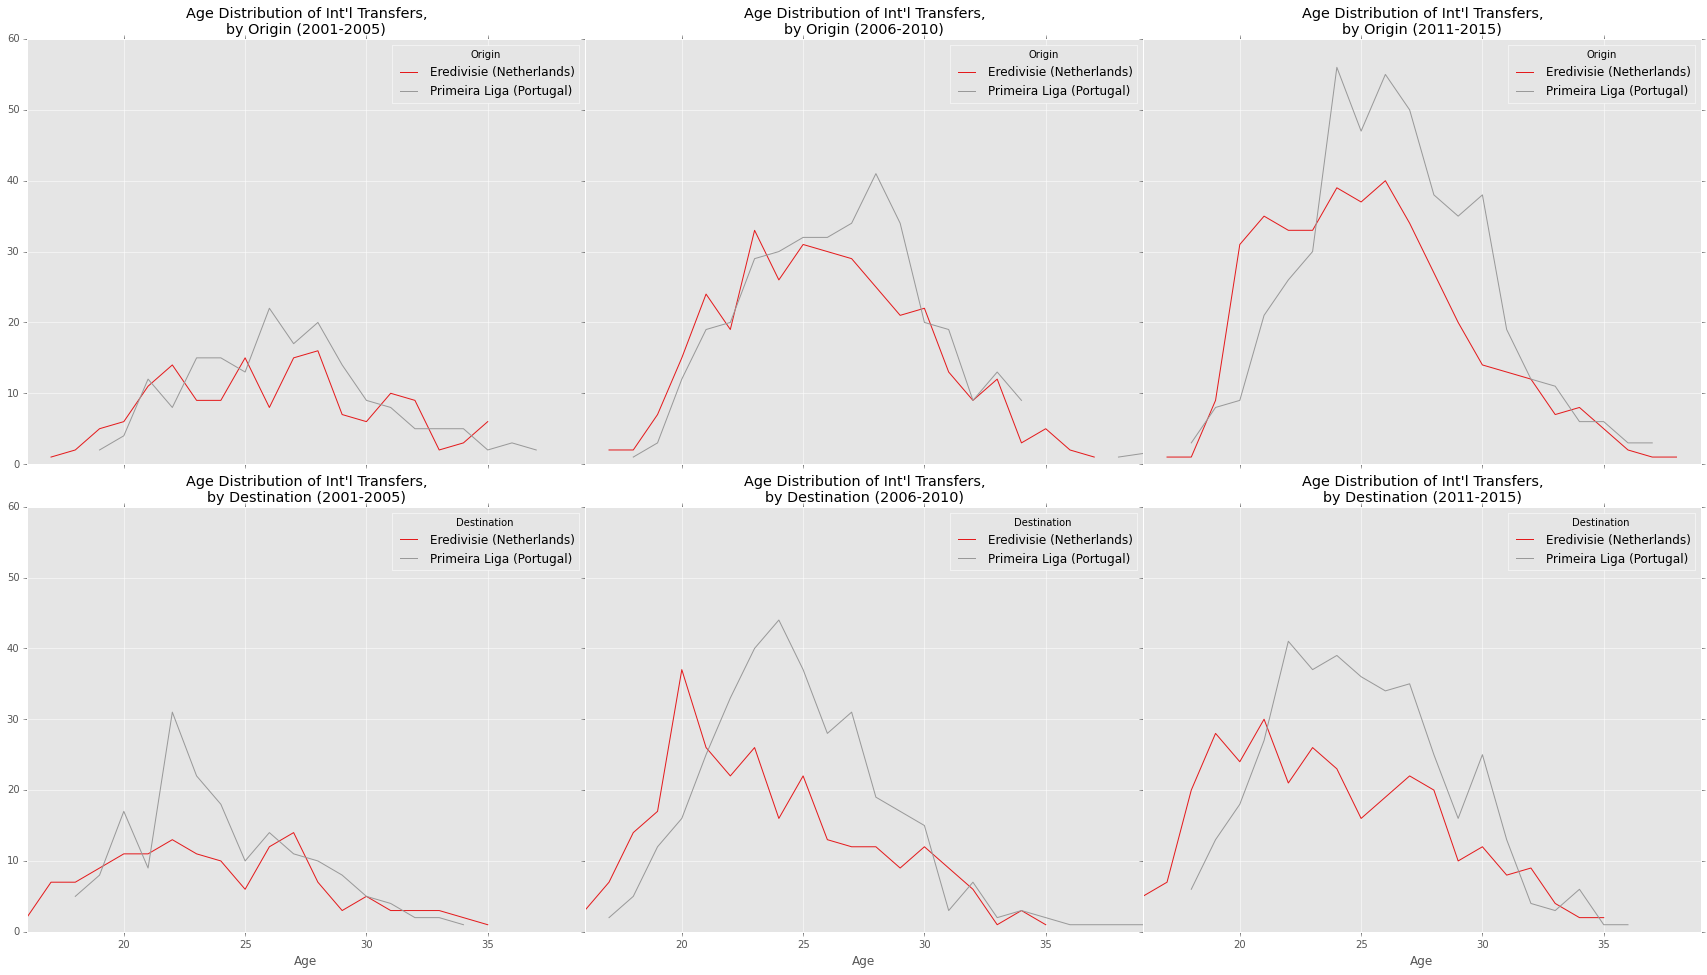

In [251]:
leagues=['NL1','PO1']

df1=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['fromLeague'].isin(leagues))] \
    .rename(columns={'fromLeague':'Origin'}).groupby(['Age','Origin','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)
    
df2=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(leagues))] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination','period'])['id'].count().unstack().unstack() \
    .rolling(window=1,center=False).mean().rename(columns=leagueCodeMapping)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 16),sharex=True,sharey=True)

#df['(1995, 2000]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (1996-2000)", colormap='Set1', legend=False)
df1['(2000, 2005]'].plot(ax=axes[0,0], title="Age Distribution of Int'l Transfers, \nby Origin (2001-2005)", colormap='Set1', legend=True)
df1['(2005, 2010]'].plot(ax=axes[0,1], title="Age Distribution of Int'l Transfers, \nby Origin (2006-2010)", colormap='Set1', legend=True)
df1['(2010, 2015]'].plot(ax=axes[0,2], title="Age Distribution of Int'l Transfers, \nby Origin (2011-2015)", colormap='Set1', legend=True)
df2['(2000, 2005]'].plot(ax=axes[1,0], title="Age Distribution of Int'l Transfers, \nby Destination (2001-2005)", colormap='Set1', legend=True)
df2['(2005, 2010]'].plot(ax=axes[1,1], title="Age Distribution of Int'l Transfers, \nby Destination (2006-2010)", colormap='Set1', legend=True)
df2['(2010, 2015]'].plot(ax=axes[1,2], title="Age Distribution of Int'l Transfers, \nby Destination (2011-2015)", colormap='Set1', legend=True)

plt.subplots_adjust(wspace=0,hspace=.1)

fig.savefig('age_by_league.png')


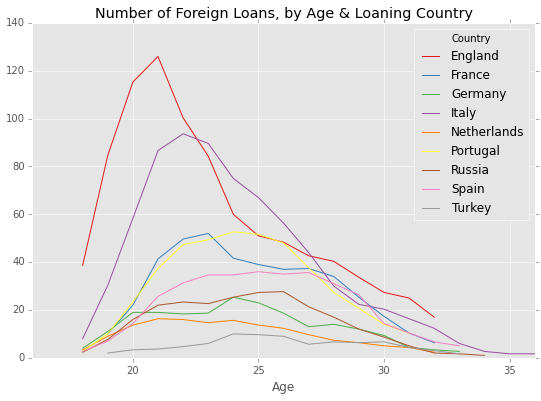

In [128]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Loaning Country',colormap='Set1')

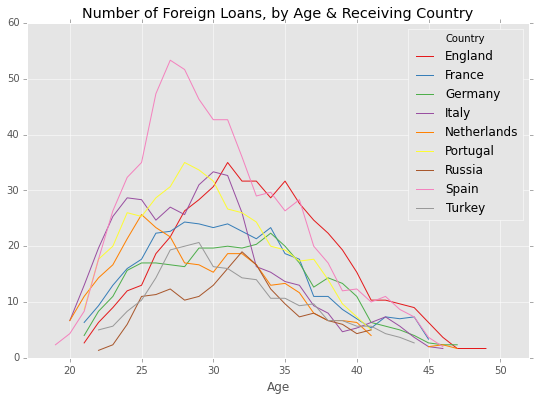

In [12]:
loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['Age','Country'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().plot.line(figsize=(9,6),title='Number of Foreign Loans, by Age & Receiving Country',colormap='Set1')

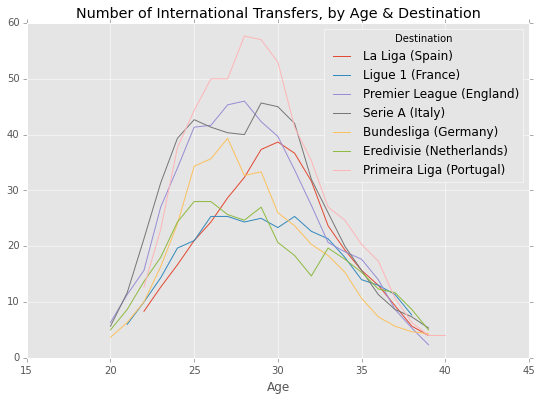

In [11]:
nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toLeague'].isin(['GB1','ES1','L1','IT1','FR1','NL1','PO1']))&(nonloans['season']>=2010)] \
    .rename(columns={'toLeague':'Destination'}).groupby(['Age','Destination'])['id'].count().unstack() \
    .rolling(window=3,center=False).mean().rename(columns=leagueCodeMapping).plot.line(figsize=(9,6),xlim=(15,45),title='Number of International Transfers, by Age & Destination')

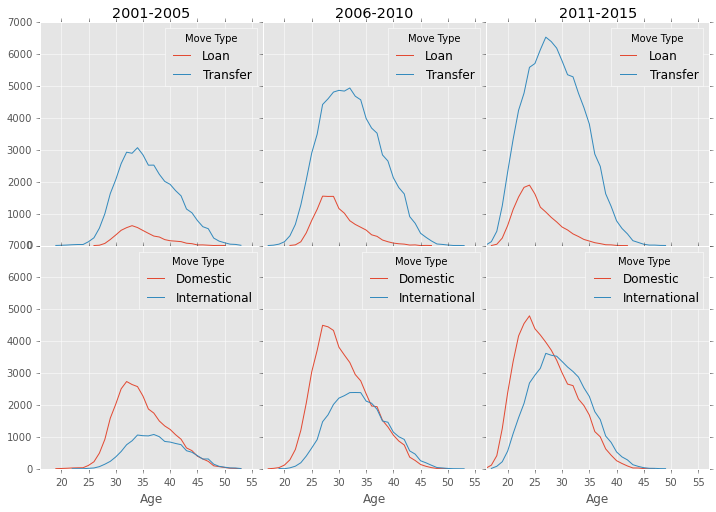

In [9]:
t=transfers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),sharex=True,sharey=True)

isLoan=t.join(pd.Series(np.where(t['isLoan'],'Loan','Transfer')).rename('Move Type')).groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()


foreignVdomestic =t.join(pd.Series(np.where(t['fromCountry']==t['toCountry'],'Domestic','International')).rename('Move Type'))\
    .groupby(['Age','Move Type','period'])['id'].count().unstack().unstack()
    
isLoan['(2000, 2005]'].plot(ax=axes[0,0],title='2001-2005')
isLoan['(2005, 2010]'].plot(ax=axes[0,1],title='2006-2010')
isLoan['(2010, 2015]'].plot(ax=axes[0,2],title='2011-2015')

foreignVdomestic['(2000, 2005]'].plot(ax=axes[1,0])
foreignVdomestic['(2005, 2010]'].plot(ax=axes[1,1])
foreignVdomestic['(2010, 2015]'].plot(ax=axes[1,2])


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

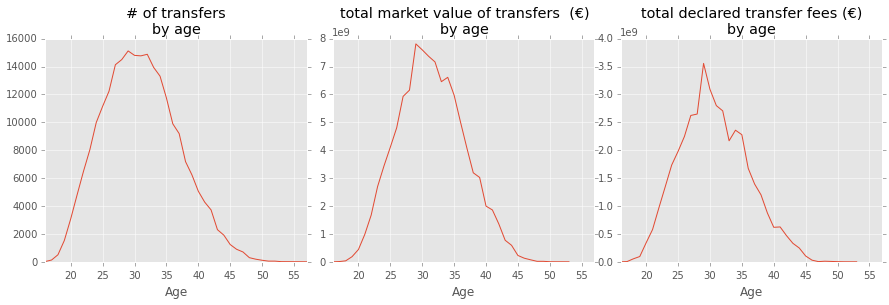

In [6]:
t=transfers[transfers['season'].between(2001,2015)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True,sharey=False)


t.groupby('Age')['id'].count().plot(ax=axes[0],title=u'# of transfers\nby age')
t.groupby('Age')['feeValue'].sum().plot(ax=axes[2], title=u'total declared transfer fees (€)\nby age')
t.groupby('Age')['mv'].sum().plot(ax=axes[1],title=u'total market value of transfers  (€)\nby age')


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves.png')

In [5]:
t[t['feeValue']>0].groupby('Age')

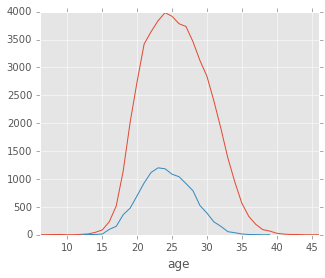

In [4]:
t=transfers[transfers['fromCountry']!=transfers['toCountry']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4),sharex=True,sharey=False)


t[t['feeValue']==0].groupby('age')['id'].count().plot(ax=axes)
t[t['feeValue']>0].groupby('age')['id'].count().plot(ax=axes)


plt.subplots_adjust(wspace=.1,hspace=0)

fig.savefig('age_curves_paid_free.png')

In [6]:
t[t['feeValue']>0]['age'].describe()

count    11495.000000
mean        24.212266
std          3.630609
min         12.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         39.000000
Name: age, dtype: float64

In [7]:
t[t['feeValue']>0]['age'].describe()

count    11495.000000
mean        24.212266
std          3.630609
min         12.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         39.000000
Name: age, dtype: float64

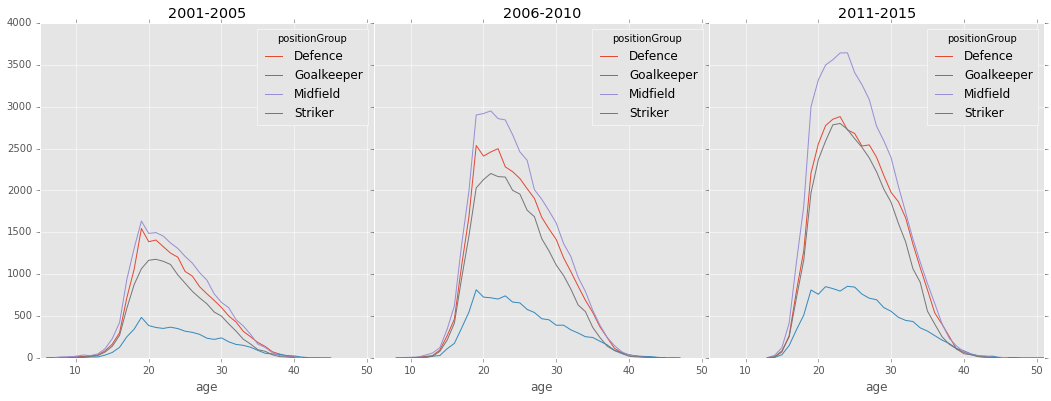

In [8]:
t=transfers

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6),sharex=True,sharey=True)

g=t.groupby(['age','positionGroup','period'])['id'].count().unstack().unstack() #.plot(ax=axes)

g['(2000, 2005]'].plot(ax=axes[0],title='2001-2005')
g['(2005, 2010]'].plot(ax=axes[1],title='2006-2010')
g['(2010, 2015]'].plot(ax=axes[2],title='2011-2015')


plt.subplots_adjust(wspace=0,hspace=0)

fig.savefig('loan_intl.png')

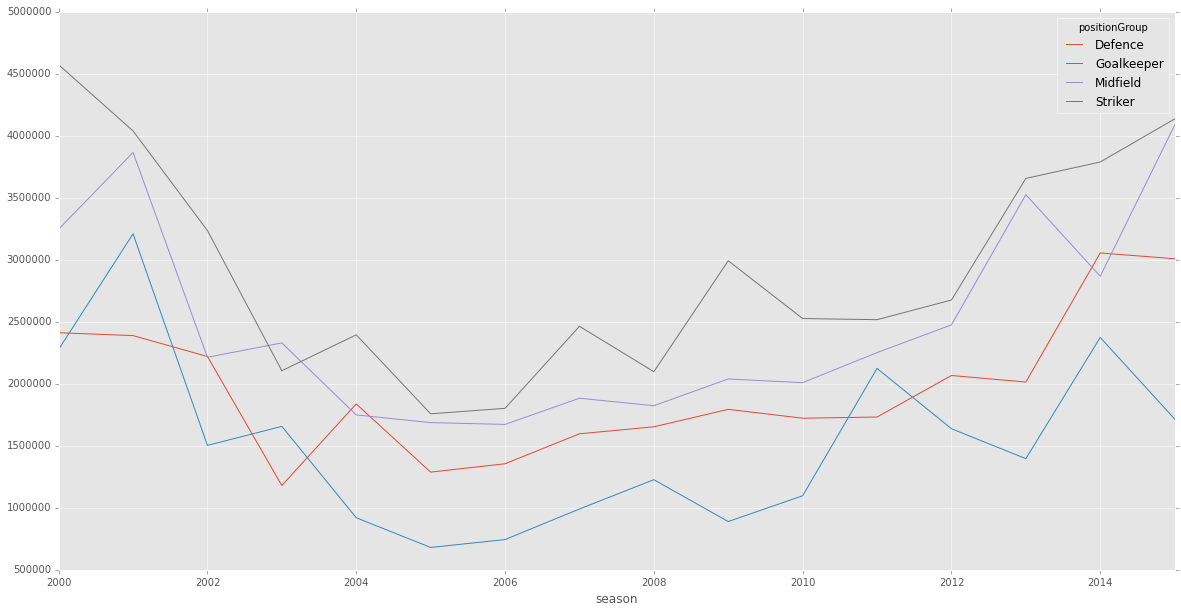

In [32]:
nonloans[(nonloans.feeValue>0)&(nonloans.season>=2000)].groupby(['season','positionGroup'])['feeValue'].mean().unstack().plot.line(figsize=(20,10))

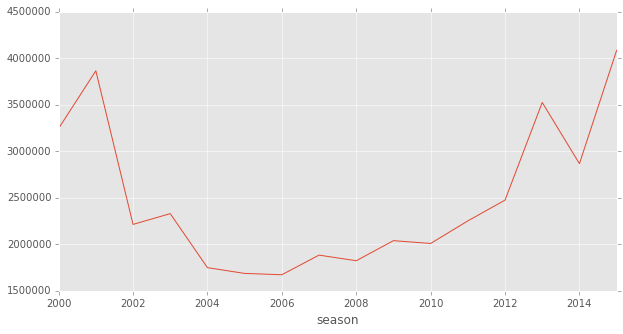

In [55]:
t=nonloans
t[(t.feeValue>0)&(t.season>=2000)&(t.positionGroup.isin(['Midfield','d']))].groupby(['season'])['feeValue'].mean().rolling(window=1,center=False).mean().plot.line(figsize=(10,5))

In [278]:
t=nonloans
x=t[(t.toLeague.isin(leagueList))].groupby(['season','toCountry'])['feeValue'].count().unstack().rolling(window=1,center=False).mean()#.plot.line(figsize=(20,20))
y=t[(t.fromLeague.isin(leagueList))].groupby(['season','fromCountry'])['feeValue'].count().unstack().rolling(window=1,center=False).mean()#.plot.line(figsize=(20,20))
z=x.join(y,lsuffix='_import',rsuffix='_export').sort_index(axis=1)
for country in x.columns:
    z[country+'_net']=z[country+'_import']-z[country+'_export']
    z[country+'_total']=z[country+'_import']+z[country+'_export']
    
z=z.sort_index(axis=1)
zt=z.T
w=zt.reset_index()['index'].str.split('_',expand=True)
w.index=zt.index
w.columns=['country','flow']
zt=zt.join(w)
zt=zt.fillna(0).groupby(['country','flow']).sum()
zt.reset_index(level=0).groupby('country').apply(lambda x: x.ix[['import','export','net','total']]).drop('country',axis=1).unstack().to_excel('../data/output/import_export.xlsx')
ztr=zt.stack().unstack(level=0).swaplevel().reset_index().groupby(['season','flow']).apply(lambda x:x.T.drop(['season','flow']).rename(columns=lambda x:'number').sort_values('number',ascending=False).reset_index()).stack().unstack(level=[0,1,3])
ztr.to_excel('../data/output/import_export_ranked.xlsx')

In [277]:
zt.stack().unstack(level=0).swaplevel().reset_index().groupby(['season','flow']).apply(lambda x:x.T.drop(['season','flow']).rename(columns=lambda x:'number').sort_values('number',ascending=False).reset_index()).stack().unstack(level=[0,1,3])

season                1992                                    \
flow                export                     import          
                   country number             country number   
0                  England     10             England     23   
1                  Germany     10              Greece     17   
2                   Serbia      7               Italy     16   
3              Netherlands      6             Germany     13   
4                   Poland      5         Netherlands     10   
5           Czech Republic      5              France     10   
6                  Austria      4             Austria      8   
7                    Italy      4         Switzerland      8   
8                   Greece      4              Turkey      4   
9                   Turkey      4               Spain      4   
10      Bosnia-Herzegovina      4      Czech Republic      3   
11                  France      2             Croatia      2   
12                Scotland      2              Sweden      2   
13                  Sweden      2              Serbia      2   
14                 Croatia      2              Poland      2   
15                Bulgaria      2            Scotland      2   
16                Slovenia      1             Hungary      1   
17              Luxembourg      1              Cyprus      1   
18                  Norway      1             Denmark      1   
19                 Romania      1          Luxembourg      1   
20                 Finland      1             Ukraine      1   
21                   Spain      1              Norway      1   
22                Slovakia      0             Romania      1   
23                 Ukraine      0              Russia      0   
24                  Russia      0            Slovenia      0   
25             Switzerland      0            Slovakia      0   
26               Lithuania      0           Lithuania      0   
27                Portugal      0            Portugal      0   
28                   Malta      0               Malta      0   
29              Azerbaijan      0          Azerbaijan      0   
30              Kazakhstan      0          Kazakhstan      0   
31                  Israel      0              Israel      0   
32                 Hungary      0             Finland      0   
33                 Denmark      0            Bulgaria      0   
34                  Cyprus      0  Bosnia-Herzegovina      0   
35                 Belgium      0             Belgium      0   
36           United States      0       United States      0   

season                                                        \
flow                   net                      total          
                   country number             country number   
0                  England     13             England     33   
1                   Greece     13             Germany     23   
2                    Italy     12              Greece     21   
3              Switzerland      8               Italy     20   
4                   France      8         Netherlands     16   
5                  Austria      4             Austria     12   
6              Netherlands      4              France     12   
7                    Spain      3              Serbia      9   
8                  Germany      3         Switzerland      8   
9                  Ukraine      1      Czech Republic      8   
10                  Cyprus      1              Turkey      8   
11                 Denmark      1              Poland      7   
12                 Hungary      1               Spain      5   
13                Portugal      0              Sweden      4   
14                 Romania      0            Scotland      4   
15                  Russia      0             Croatia      4   
16                Slovakia      0  Bosnia-Herzegovina      4   
17                Scotland      0          Luxembourg      2   
18                  Sweden      0            Bulgaria      2   
19                  Turkey     

In [166]:
zt.reset_index(level=0)

season,country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
flow,,,,,,,,,,,,,,,,,,,,,
export,Austria,4.0,5.0,7.0,5.0,21.0,19.0,22.0,20.0,20.0,...,80.0,61.0,80.0,81.0,70.0,65.0,67.0,60.0,85.0,63.0
import,Austria,8.0,3.0,10.0,7.0,28.0,28.0,32.0,19.0,31.0,...,74.0,87.0,82.0,68.0,64.0,58.0,59.0,61.0,69.0,53.0
net,Austria,4.0,-2.0,3.0,2.0,7.0,9.0,10.0,-1.0,11.0,...,-6.0,26.0,2.0,-13.0,-6.0,-7.0,-8.0,1.0,-16.0,-10.0
total,Austria,12.0,8.0,17.0,12.0,49.0,47.0,54.0,39.0,51.0,...,154.0,148.0,162.0,149.0,134.0,123.0,126.0,121.0,154.0,116.0
export,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,21.0,26.0,20.0,28.0,56.0,46.0,59.0,64.0
import,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,26.0,27.0,40.0,45.0,69.0,54.0,41.0,79.0
net,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,6.0,5.0,1.0,20.0,17.0,13.0,8.0,-18.0,15.0
total,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,12.0,47.0,53.0,60.0,73.0,125.0,100.0,100.0,143.0
export,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,...,170.0,130.0,141.0,106.0,99.0,109.0,93.0,98.0,96.0,101.0


In [140]:
z.T.index

Index([u'Austria_export', u'Austria_import', u'Austria_net', u'Austria_total',
       u'Azerbaijan_export', u'Azerbaijan_import', u'Azerbaijan_net',
       u'Azerbaijan_total', u'Belgium_export', u'Belgium_import',
       ...
       u'Turkey_net', u'Turkey_total', u'Ukraine_export', u'Ukraine_import',
       u'Ukraine_net', u'Ukraine_total', u'United States_export',
       u'United States_import', u'United States_net', u'United States_total'],
      dtype='object', length=148)

,toCountry,toLeague


In [117]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1']